## Data Visualization_Century21_Real_Estate

In [1]:
## Import Libraries required for the cleaning, preprocessing and Data Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
## Reading the csv data file of the whole data using read_csv method from pandas
import pandas as pd
df = pd.read_csv('Century_preprocessed.csv',index_col=[0])
Cent_visual= df
Cent_visual.head(5)

,Address,City,Price,Bed,Bath,Sqft
0,818SouthgateAVE,DalyCity,1180000.0,3.0,2.0,1330.0
1,1403YewSt,SanMateo,2680000.0,4.0,3.0,1904.0
4,41323rdStreetUnit5,SanFrancisco,949500.0,2.0,2.0,1314.0
5,108OakCT108,DalyCity,725000.0,2.0,2.0,1081.0
6,81FieldcrestDrive,DalyCity,1380000.0,3.0,2.0,2200.0


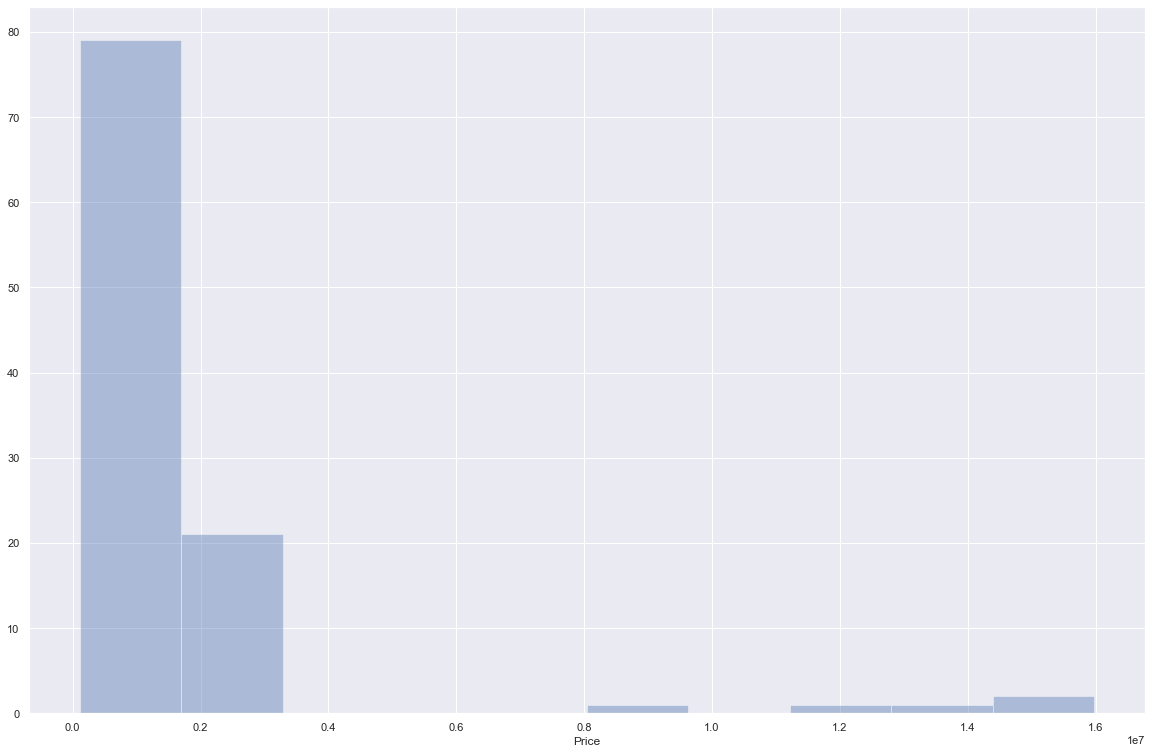

In [39]:
#How the prices are distributed

sns.distplot(Cent_visual['Price'],kde = False, bins = 10)
plt.savefig('Distribution of Price')

#### Research question : How does the price per sqft for a house change with the size of the house?

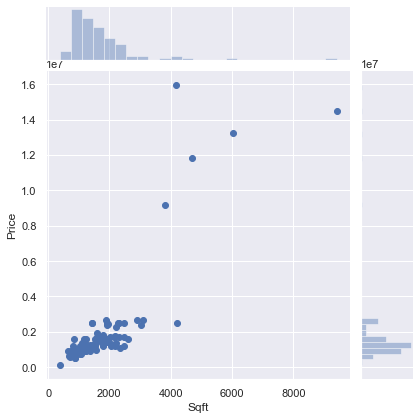

In [41]:
sns.jointplot(x='Sqft',y='Price',data=Cent_visual,kind='scatter')
plt.savefig('Price & Sqft')

Text(0.5, 1.0, 'Price vs Square Feet')

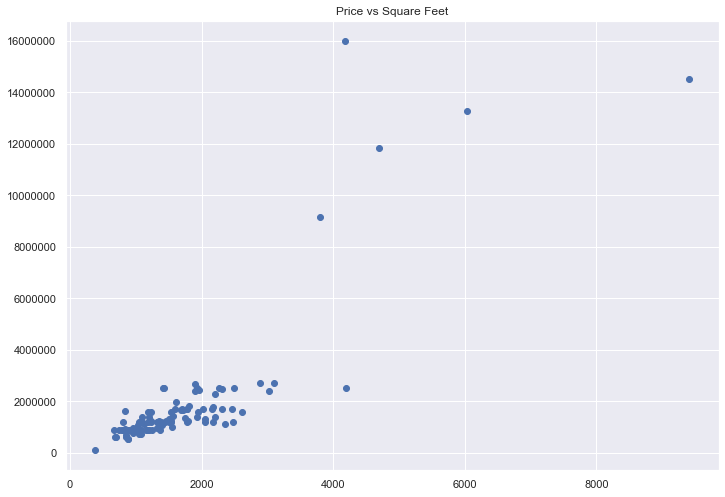

In [23]:
plt.scatter(Cent_visual.Sqft,Cent_visual.Price)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Price vs Square Feet")

As the square feet increase the price increases as well

In [5]:
#Pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

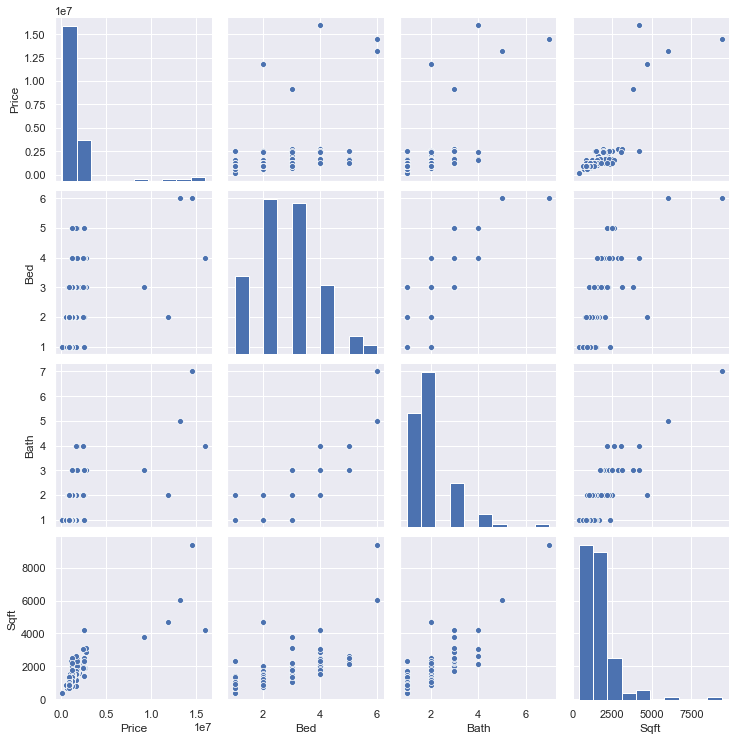

In [42]:
sns.pairplot(Cent_visual)
plt.savefig('Pairwise comparison')

#### Research Question : Find the variation of house price by number of bedrooms.

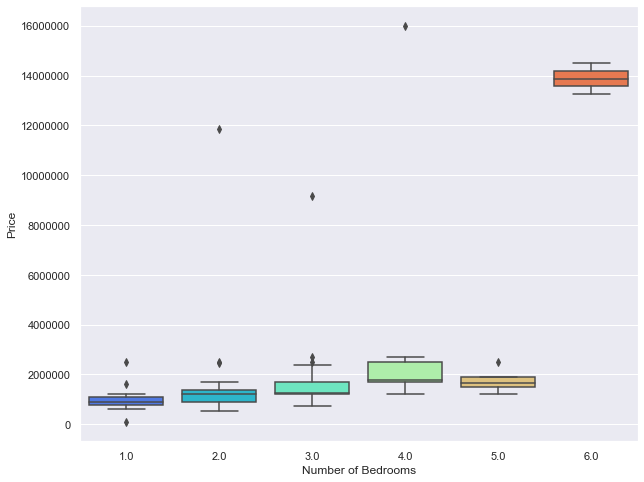

In [53]:
sns.boxplot(x='Bed',y='Price',data=Cent_visual,palette='rainbow')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.savefig('Price & Bed')

#### Research Question : What is the distribution of house prices that are currently on market in San Francisco bay Area, Cities in Peninsula ?


Text(0.5, 1.0, 'Average Prices by Cities')

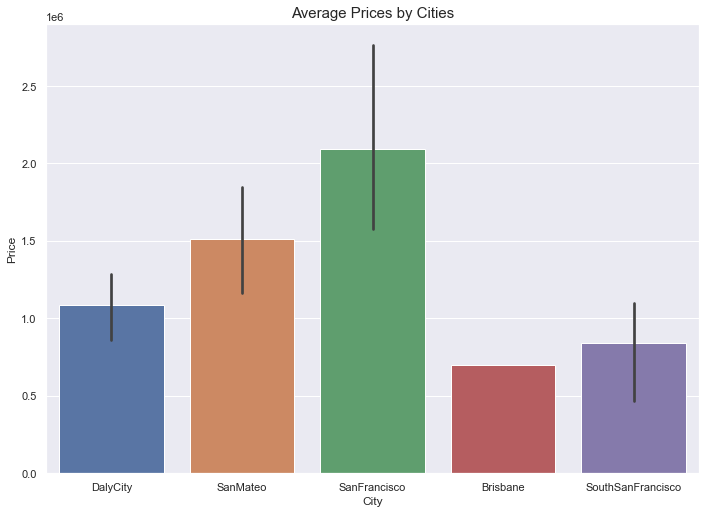

In [57]:
#mean/ avg of prices per city
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='City',y='Price',data=Cent_visual)
plt.title('Average Prices by Cities',fontsize=15)

The cities with highest average house prices are San Franciso & San Mateo and the lowest average property prices is Brisbane City

#### Research Question: Which city has the largest average square feet? 

Text(0.5, 1.0, 'Average Sqft Per City')

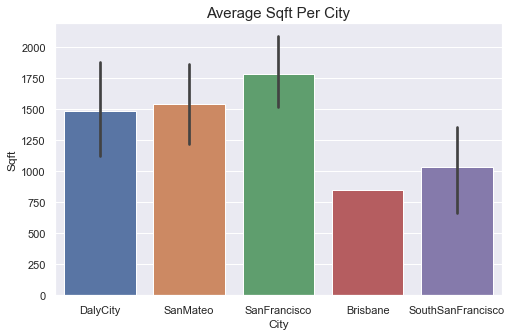

In [88]:
#mean/ avg of Sqft per City
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='City',y='Sqft',data=Cent_visual)
plt.title('Average Sqft Per City',fontsize=15)

Largest Square feet of houses are in San Francisco, San Mateo & Daly City & lowest sqft are in Brisbance City

Text(0.5, 1.0, 'Average Bed per Sqft')

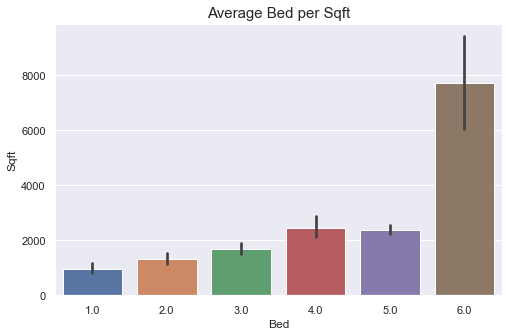

In [60]:
# Square feet & bed comparison
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='Bed',y='Sqft',data=Cent_visual)
plt.title('Average Bed per Sqft',fontsize=15)

On an average around 7000 sqft houses have around 6 bed & house with 1 bed has an average sqft between 800-900

Text(0.5, 1.0, 'Average Bath per Price')

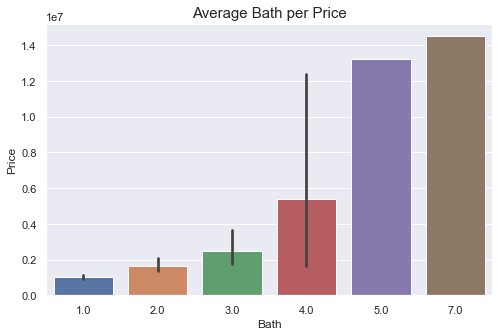

In [64]:
#Price & Bath
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='Bath',y='Price',data=Cent_visual)
plt.title('Average Bath per Price',fontsize=15)

On an average house with 7 bath have the highest price of 14.5 million and propery with 5 bath has an average price around  8 Million


Text(0.5, 1.0, 'Average Bed per Price')

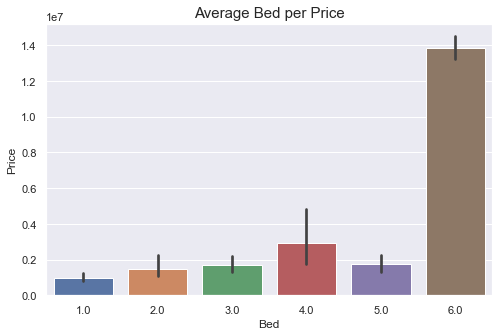

In [66]:
#Price & Bed
sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(x='Bed',y='Price',data=Cent_visual)
plt.title('Average Bed per Price',fontsize=15)

Property with 6 bed on an average price of less than 14 million.

#### Research Question: Which variables are correlated?

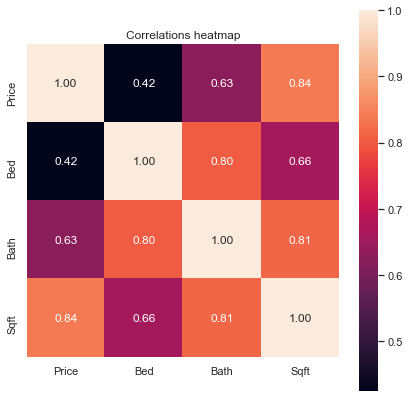

In [28]:
columns_num=['Price','Bed','Bath','Sqft',
           ]
#Find out correlation between columns and plot
corrs = np.corrcoef(Cent_visual[columns_num].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = columns_num, xticklabels = columns_num).set_title('Correlations heatmap')

fig = hm.get_figure()
fig.savefig('correlations.png')

Price & Square feet are highly correlated around 84%
Square feet and bath are also correlated around 81%

### Median Price of Home

Which Cities have the highest median price?

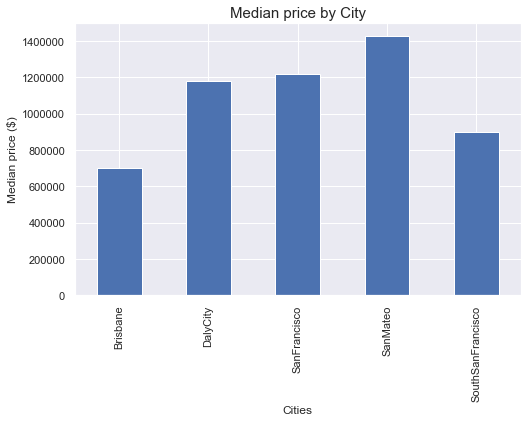

In [72]:
average_price_by_hometype = Cent_visual.groupby(['City'])['Price'].median()
#bar chart presents the average price by hometype
average_price_by_hometype.plot.bar()
plt.ylabel('Median price ($)')
plt.xlabel('Cities')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Median price by City',fontsize=15)
plt.savefig('Median price by City')
plt.show()

In [30]:
pd.options.display.float_format = "{:.0f}".format # Suppress Scientific Notation
# Dataframe of average price by hometype
price_by_hometypes=pd.DataFrame(average_price_by_hometype, columns=['Price'])
averageprice_hometypes=price_by_hometypes.rename(columns={'Price':'Median Price'})
averageprice_hometypes.sort_values(by='Median Price',ascending=False)

,Median Price
City,
SanMateo,1425000
SanFrancisco,1219000
DalyCity,1180000
SouthSanFrancisco,899000
Brisbane,699000


Median home prices of San Mateo are the highest followed by SF and Daly City

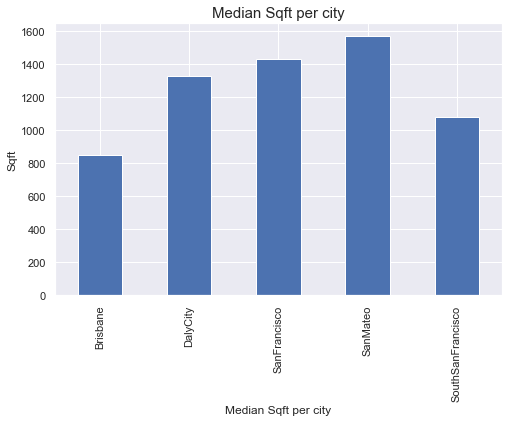

In [74]:
average_sqft_by_hometype = Cent_visual.groupby(['City'])['Sqft'].median()
#bar chart presents the average price by hometype
average_sqft_by_hometype.plot.bar()
plt.ylabel('Sqft')
plt.xlabel('Median Sqft per city')
plt.title('Median Sqft per city',fontsize=15)
#Amongst all the data home with 2 bathroom has the highest occurance and 7 bath have the lowest occurance
plt.show()

In [33]:
pd.options.display.float_format = "{:.0f}".format # Suppress Scientific Notation
# Dataframe of average Sqft by hometype
price_by_hometypes=pd.DataFrame(average_sqft_by_hometype, columns=['Sqft'])
averagesqft_hometypes=price_by_hometypes.rename(columns={'Sqft':'Median Sqft'})
averagesqft_hometypes.sort_values(by='Median Sqft',ascending=False)

,Median Sqft
City,
SanMateo,1570
SanFrancisco,1435
DalyCity,1330
SouthSanFrancisco,1082
Brisbane,848


San Mateo has the highest avg median square feet

In [34]:
min_price=Cent_visual['Price'].min()
max_price=Cent_visual['Price'].max()
Different_propety_Price=pd.DataFrame({'Minimum_price':[min_price],'Max_price':[max_price]})
Different_propety_Price

,Minimum_price,Max_price
0,109900,15980000


The Minimum Price 109900 & Maximum propery price is 15980000

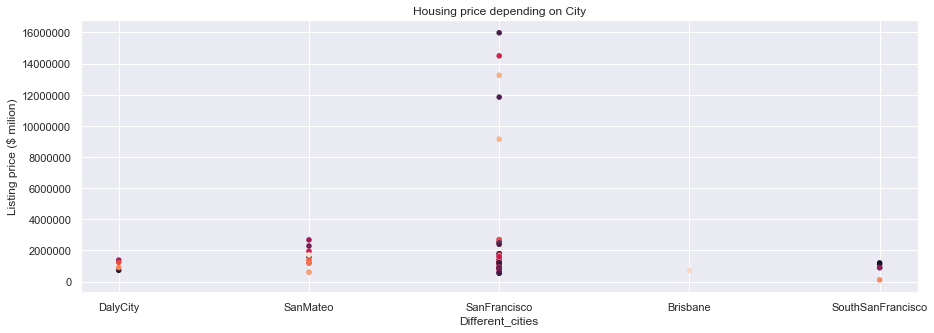

In [75]:
#Plot
plt.figure(figsize=(15,5))
colors = np.random.rand(len(Cent_visual))
area = 20 
plt.scatter(Cent_visual['City'],Cent_visual['Price'] , s=area,c=colors, alpha=1)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Different_cities')
plt.ylabel('Listing price ($ milion)')
plt.title('Housing price depending on City')
plt.show()


Housing prices in San Francisco are the highest & Brisbane has the lowest

<AxesSubplot:xlabel='City', ylabel='count'>

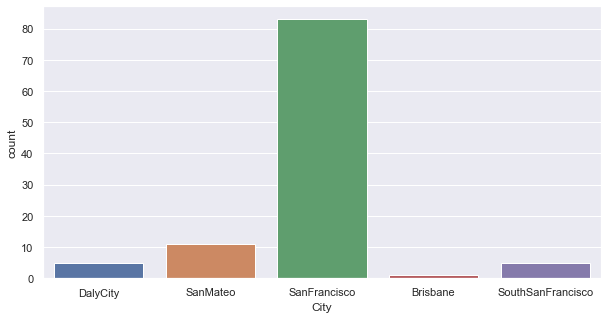

In [79]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='City',data=Cent_visual)

San Francisco has the maximum number of houses out amongst all the data

<AxesSubplot:xlabel='Bed', ylabel='count'>

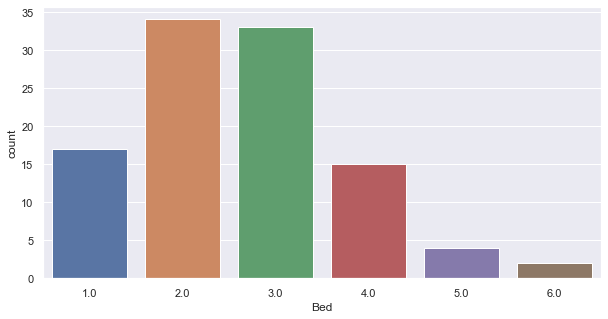

In [78]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='Bed',data=Cent_visual)

Amongst all the data house with 2 bed has the highest occurance and 6 bath has the lowest occurance

<AxesSubplot:xlabel='Bath', ylabel='count'>

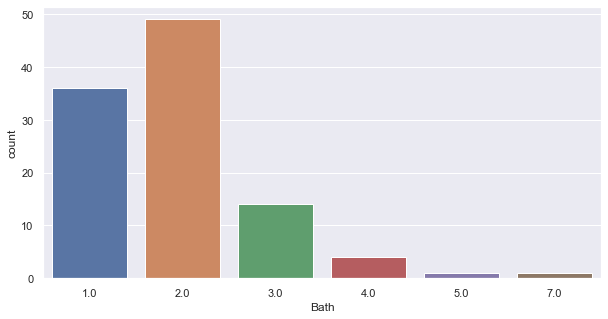

In [77]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='Bath',data=Cent_visual)

Amongst all the data home with 2 bathroom has the highest occurance and 7 bath have the lowest occurance

## Linear Regression

In [45]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm


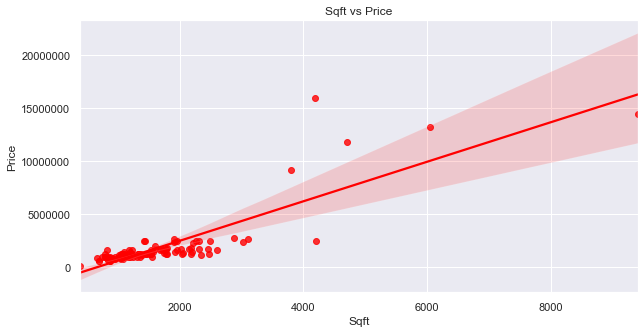

In [76]:
sns.set(rc={'figure.figsize':(10,5)})
sns.regplot('Sqft','Price',data=Cent_visual,color='red')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Sqft vs Price')
plt.show()

• The line shows an upward trend, that the larger the square feet, the housing price tends to be higher. Therefore, the Sqft has a positive relationship to the housing price.

• So, the Sqft is a factor can make the housing price higher.


In [47]:
x=Cent_visual['Sqft'].values.reshape(-1,1)
y=Cent_visual['Price'].values.reshape(-1,1)
reg=LinearRegression()
reg.fit(x,y)
print("The linear model is Y={:,.1f}+{:,.1f}x".format(reg.intercept_[0],reg.coef_[0][0]))

The linear model is Y=-1,267,113.3+1,868.5x


Regression Coefficient tells us that for every one unit increase in Sqft there is $855.1 increase in Price

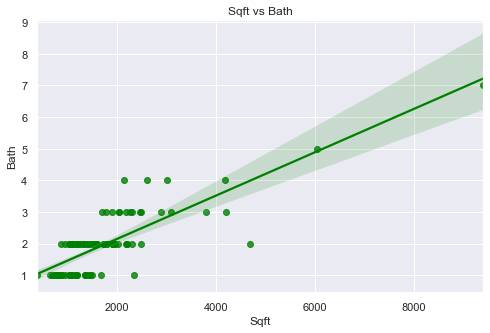

In [83]:
sns.set(rc={'figure.figsize':(8,5)})
sns.regplot('Sqft','Bath',data=Cent_visual,color='green')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Sqft vs Bath')
plt.show()

• The line shows an upward trend, that the larger the square feet, the number of bath tends to be increase. Therefore, the Sqft has a positive relationship to the Number of beds.

• So, the Sqft is a factor can make a difference in the number of baths a house an have

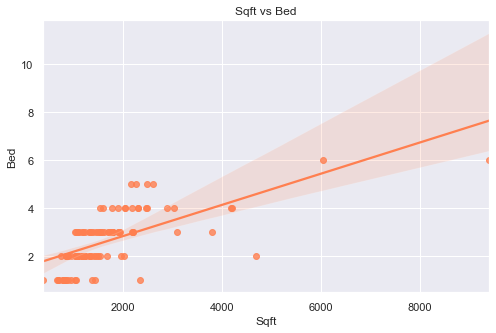

In [82]:
sns.set(rc={'figure.figsize':(8,5)})
sns.regplot('Sqft','Bed',data=Cent_visual,color='coral')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Sqft vs Bed')
plt.show()

• The line shows an upward trend, that the larger the square feet, the number of bed tends to be increase. Therefore, the Sqft has a positive relationship to the Number of beds.

• So, the Sqft is a factor can make a difference in the number of beds a house an have

## Linear Regression Model

In [52]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
#we can use R style formulas:
results = smf.ols('Price ~ Sqft+ Bath+Bed', data=Cent_visual).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     92.46
Date:                Mon, 10 May 2021   Prob (F-statistic):           7.48e-29
Time:                        15:57:07   Log-Likelihood:                -1629.7
No. Observations:                 105   AIC:                             3267.
Df Residuals:                     101   BIC:                             3278.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.921e+05   3.37e+05     -1.462      0.1

• The p value of 0.0  for Sqft is saying there is strong correlation between two variables(Sqft & price).

• Significant variables that affect the price are Bed & Sqft as the p value is less than 0.05

• R Square value tells us that about 73 % of the variability of Price is explained by other independent variables(Sqft,Bath & Bed)
